# Train sentiment analysis model

In [1]:
import pandas as pd
from sentiment_analysis_model import SentimentAnalysisModel
    
data = pd.read_csv('./data/Finance_data.csv')
sentiment_analysis_model = SentimentAnalysisModel(data).preprocess_data().train_model()

/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Preprocess tesla dataframe 

In [2]:
from utils import ast_to_est
from datetime import datetime as dt
tesla_data2 = pd.read_csv('./data/2021.csv', sep=',')
tesla_data = pd.read_csv('./data/2022.csv', sep=',')
# Concatenate two dataframes
tesla_data = pd.concat([tesla_data, tesla_data2])

# For each line in data, only select lines that contain the word "tesla"
tesla = tesla_data[tesla_data['tweet'].str.contains('[t|T]esla')]

# Create a new column that contains the date and time in EST
tesla['created_at_est'] = tesla['created_at'].apply(ast_to_est) 

# Drop all rows before 2021-04-15 (which is ~730 days before today)
# TODO: Make this dynamic instead of relying on a hardcoded date
tesla = tesla[tesla['created_at_est'] >= '2021-04-15 00:00:00']


/var/folders/xr/6zg9zg9d2jx2957vpypkzfqm0000gn/T/ipykernel_98599/1172922555.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['created_at_est'] = tesla['created_at'].apply(ast_to_est)


# Create sentiment score labels for tesla dataframe

In [3]:
# Using the tesla dataframe, create a new dataframe that contains the polarity score for each example
# Create a new column that contains the polarity score for each example
# Positive shall be 1 and negative shall be 0
tesla['polarity'] = tesla['tweet'].apply(lambda x: 1 if sentiment_analysis_model.predict(x)[0] == 'positive' else 0)


# Drop all columns except for the date and polarity
tesla = tesla[['created_at_est', 'polarity', 'tweet']]
tesla.to_csv('./tesla.csv', index=False)


# Create price prediction dataset


In [4]:
from get_price_data import PriceDataRetrieverAndPreprocessor
import datetime as dt

# Get the minimum and maximum dates
start = tesla['created_at_est'].min()
end = tesla['created_at_est'].max()    

interval = '60m'
ticker = 'TSLA'

df = PriceDataRetrieverAndPreprocessor(ticker, start, end, polarity_score_df=tesla, interval=interval).retrieve().preprocess()
# print(df)
df.to_csv('./df.csv', index=False)
label = 'Price polarity over interval'
y = df[label].values
X = df.drop([label],axis=1).values


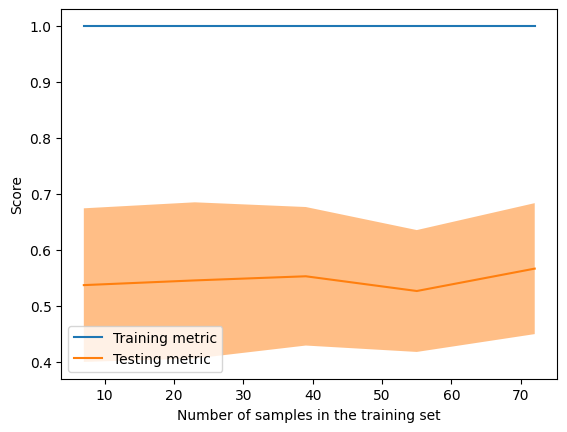

In [5]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
model = DecisionTreeClassifier(random_state=0, criterion="gini")
LearningCurveDisplay.from_estimator(model, X, y, cv = ShuffleSplit(n_splits=50, test_size=0.2), score_type= "both")
# model.fit(X_train, y_train)

In [6]:
from random import random
model.predict(np.array([[1.67275620e+18, 1.67275980e+18, random()]]))


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.